# Principal Component Analysis (PCA)

PCA is a non-parametric, un-supervised, linear transformation dimensionality reduction technique. PCA helps for high dimensional data by letting you see in which directions your data has the most variance. These directions are the principal components.

Principal components have both direction and magnitude. The direction represents across which principal axes the data is mostly spread out or has most variance and the magnitude signifies the amount of variance that Principal Component captures of the data when projected onto that axis. 

The principal components are a straight line, and the first principal component holds the most variance in the data. Each subsequent principal component is orthogonal to the last and has a lesser variance. In this way, given a set of x correlated variables over y samples you achieve a set of u uncorrelated principal components over the same y samples.

eigenvectors are called the principal components

The eigenvalues in SVD help you determine what variables are most informative, and which ones you can do without.


Other techniques for dimensionality reduction are Linear Discriminant Analysis (LDA) and Kernel PCA (used for non-linearly separable data).

### PCA Vs. Linear Discriminant Analysis

Both Linear Discriminant Analysis (LDA) and PCA are linear transformation methods. PCA yields the directions (principal components) that maximize the variance of the data, whereas LDA also aims to find the directions that maximize the separation (or discrimination) between different classes, which can be useful in pattern classification problem (PCA "ignores" class labels).
In other words, PCA projects the entire dataset onto a different feature (sub)space, and LDA tries to determine a suitable feature (sub)space in order to distinguish between patterns that belong to different classes.

__Is PCA a feature selection technique?__

It is not a feature selection technique. Rather, it is a feature combination technique. Because each PC is a weighted additive combination of all the columns in the original dataset.


### SVD (works on dense matrix)

This is very similar to PCA, except the factorization for SVD is done on the data matrix, whereas for PCA, the factorization is done on the covariance matrix. SVD states that a matrix can be represented as the product of three other matrices. The diagonal values in the Sigma matrix are known as the singular values of the original matrix A. 

### TruncatedSVD (works on sparse data)
Truncated SVD is a matrix factorization technique that factors a matrix M into the three matrices U, Σ, and V. This is not a full factorization technique.

### Non negative matrix factorization

NMF models are interpretable (unlike PCA). All sample features must be non-negative (>= 0)i.e. NMF fits to non-negative data only

### t-SNE (a visualization techinique)

### Latent Dirichlet Allocation (use for topic modelling)

Another non-negative algorithm for matrix factorization is called Latent Dirichlet Allocation which is based on Bayesian inference.

![](https://qphs.fs.quoracdn.net/main-qimg-e451c0a329c1b35043a2f9f6c1a54fc5)

![](https://qphs.fs.quoracdn.net/main-qimg-daf30ce6ecf85035af12e97659108f0a.webp)

### LDA2 is not preferred

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
y = cancer.target

In [4]:
#PCA requires scaling/normalization of the data to work properly
# scale the data so that each feature has unit variance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

In [5]:
# fit PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=6).fit(scaled_data) #  "components" and "explained variance"
#print(pca.components_)

In [6]:
x_pca = pca.transform(scaled_data)
scaled_data.shape, x_pca.shape

((569, 30), (569, 6))

Text(0, 0.5, 'Second Principal Component')

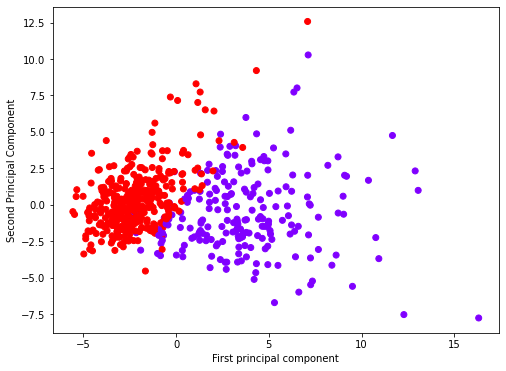

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [8]:
# The percentage of the explained variance
pca.explained_variance_ratio_

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
       0.04024522])

In [9]:
# The variance i.e. the actual eigenvalues of the covariance matrix
pca.explained_variance_

array([13.30499079,  5.7013746 ,  2.82291016,  1.98412752,  1.65163324,
        1.20948224])

## Plot the explained variance ratio

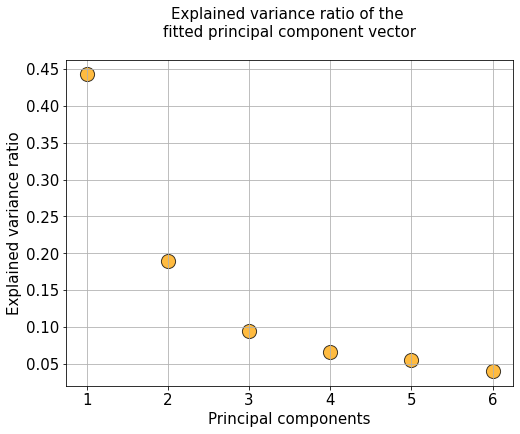

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(x=[i+1 for i in range(len(pca.explained_variance_ratio_))],
            y=pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=15)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

## Choosing the number of components

Text(0, 0.5, 'Cumulative explained variance')

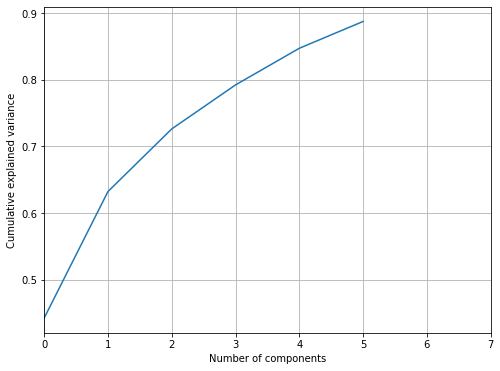

In [11]:
plt.figure(figsize=(8,6))
plt.grid(True)
plt.xlim(0,7,1)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

# Linear Discriminant Analysis

Linear Discriminant Analysis is a popular technique for performing dimensionality reduction on a dataset. Dimensionality reduction is the reduction of a dataset from  n  variables to  k  variables, where the  k  variables are some combination of the  n  variables that preserves or maximizes some useful property of the dataset. In the case of Linear Discriminant Analysis, the new variables are chosen (and the data reprojected) in a way that maximizes the linear separability of a certain set of classes in the underlying data.

An LDA transformation is useful as a preprocessing step when modeling classes because it transforms the space in such a way that algorithms which then go and draw those boundaries, like support vector machines, perform much better on the transformed data than on the original projections.

In [12]:
# fit lDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(scaled_data, y)

__LDA Producing Fewer Components Than Requested in Python__

LDA is not a dimensionality reduction technique. LDA is a classifier, the fact that people visualize decision function is just a side effect, and - unfortunately for your use case - decision function for binary problem (2 classes) is 1 dimensional. There is nothing wrong with your code, this is how every single decision function of a linear binary classifier looks like.

In general for 2 classes you get at most 1-dim projection and for K>2 classes you can get up to K-dim projection. With other decomposition techniques (like 1 vs 1) you can go up to K(K-1)/2 but again, only for more than 2 classes.

In [13]:
data=pd.DataFrame(X_lda)

data.head()

,0
0,-3.323927
1,-2.319108
2,-3.747425
3,-4.048549
4,-2.281158
